In [1]:
from pynq import Overlay

import numpy as np
import cv2
import argparse
import sys
import os

# Load dualcam helper script
sys.path.append(os.path.abspath('../'))
sys.path.append(os.path.abspath('./'))
from avnet_dualcam.dualcam import DualCam

from matplotlib import pyplot as plt

In [2]:
# Load dualcam design as PYNQ overlay
overlay = Overlay('u96v2-dualcam-dpu.bit')

In [3]:
# Display contents of overlay
overlay?

In [9]:
# Initialize Capture Pipeline
dualcam = DualCam('ar0144_dual',1280,800)


[DualCam] Looking for devices corresponding to AP1302
/dev/video0
/dev/media0
ap1302.4-003c

[DualCam] hostname =  u96v2

[DualCam] Detected 96Boards dualcam (sensors placed right-left on board)

[DualCam] Initializing capture pipeline for  ar0144_dual 1280 800
media-ctl -d /dev/media0 -V "'ap1302.4-003c':2 [fmt:UYVY8_1X16/2560x800 field:none]"
media-ctl -d /dev/media0 -V "'b0000000.mipi_csi2_rx_subsystem':0 [fmt:UYVY8_1X16/2560x800 field:none]"
media-ctl -d /dev/media0 -V "'b0000000.mipi_csi2_rx_subsystem':1 [fmt:UYVY8_1X16/2560x800 field:none]"
media-ctl -d /dev/media0 -V "'b0010000.v_proc_ss':0 [fmt:UYVY8_1X16/2560x800 field:none]"
media-ctl -d /dev/media0 -V "'b0010000.v_proc_ss':1 [fmt:RBG24/2560x800 field:none]"
media-ctl -d /dev/media0 -V "'b0040000.v_proc_ss':0 [fmt:RBG24/2560x800 field:none]"
media-ctl -d /dev/media0 -V "'b0040000.v_proc_ss':1 [fmt:RBG24/2560x800 field:none]"

[DualCam] Disabling Auto White Balance
v4l2-ctl --set-ctrl white_balance_auto_preset=0 -d /dev/video

[ WARN:0] global ./modules/videoio/src/cap_gstreamer.cpp (1100) open OpenCV | GStreamer warning: Cannot query video position: status=0, value=-1, duration=-1


In [10]:
# Capture frames
left,right = dualcam.capture_dual()

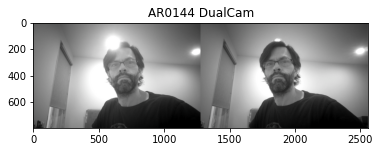

In [11]:
# Display frames
output = cv2.hconcat([left,right])
plt.imshow(output)
plt.title('AR0144 DualCam')
plt.show()


In [8]:
# Close Capture Pipeline
dualcam.release()